# Nba Shots Log Presentation

In [6]:
from IPython.display import Image 


## Goals:
### Gain initial insights on the parameters that affect the shooting percentage in a basketball game according to various parameters:
* **Physical players skills parameters:** Player Height, Players Strong shooting Hand, position
* **Technical shot skills parameters:** Shooting quickness,Shot off dribble, Shot distance
* **Mental skills parameters:** Money time shots, shot clock time,shot after sequence of shots made,shot after sequence of shots miss
* **Defenders skills parameters:** Defenders Height, Defenders Strong shooting Hand , Defenders from shooter 
* **Court parameters:** Crowd (Home or Away Game)


# Basketball basic Terminology and basic details:

## NBA 
    
The National Basketball Association (NBA) is a men's professional basketball league in North America; composed of 30 teams (29 in the United States and 1 in Canada). It is widely considered to be the premier men's professional basketball league in the world. <br>
From https://en.wikipedia.org/wiki/National_Basketball_Association


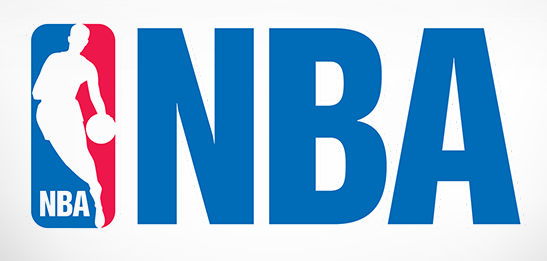

In [7]:
Image(filename='nba.png')

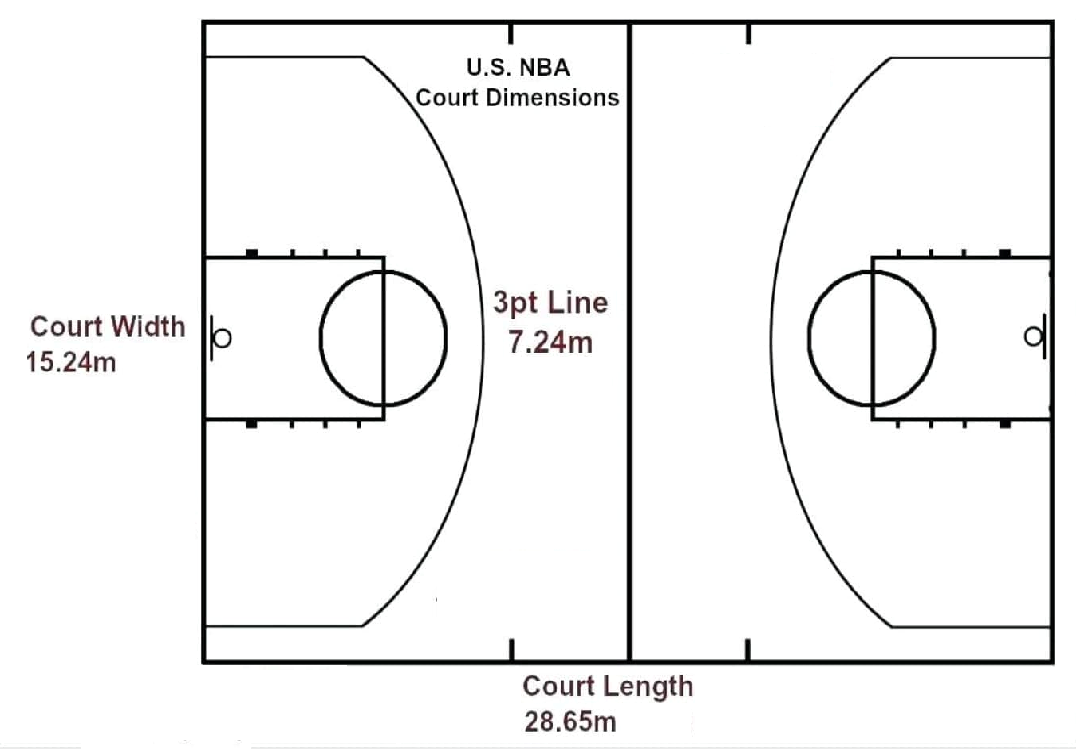

In [8]:
Image(filename='nba_court.jpg')



 ## Players positions (from wikipedia) 
 * The point guard (PG) ,also known as the one, is typically the team's best ball handler and passer.
 * The shooting guard (SG) is also known as the two or the off guard.As the name suggests, most shooting guards are good shooters from three-point range.
 * The small forward (SF), also known as the three, is considered to be the most versatile of the main five basketball positions. 
 * The power forward (PF), also known as the four, often plays a role similar to that of the center, down in the "post" or "low blocks". The power forward is often the team's most versatile scorer
 * The center (C), also known as the five or the pivot, usually plays near the baseline, close to the basket (the "low post"). They are usually the tallest players on the floor <br>
 From https://en.wikipedia.org/wiki/Basketball_positions#Point_guard

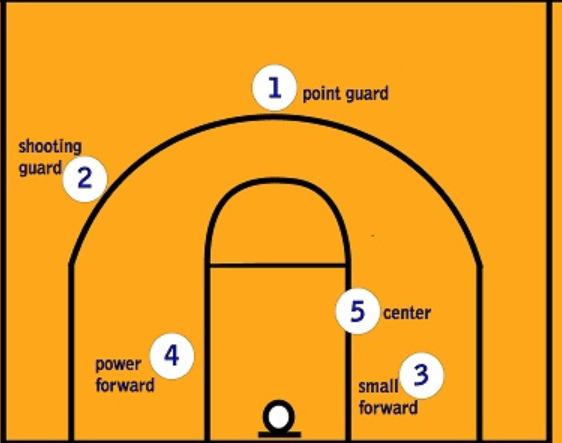

In [9]:

Image(filename='basket_ball_positions.png')


## Shot clock 
**What is Shot Clock?**<br>
The amount of time an offense is given to shoot the ball. The shot clock is 24 seconds in the NBA and 35 seconds in NCAA men's basketball. Other amateur leagues sometimes use a 30-second shot clock,The shot clock resets when the ball touches the rim.<br>
From: https://www.sportingcharts.com/dictionary/nba/shot-clock.aspx

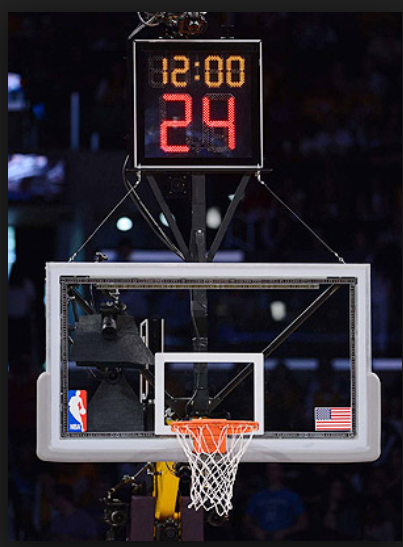

In [10]:

Image(filename='shot_clock.png')

## Money Time 
**What is 'Money Time'?**<br>
In basketball (or in sports), the "money time" is the period during the game,( mostly last minutes of play or sometimes the last quarter ) where the score game is close and  each successful pass, each basket or any action  affects the final result of the game.<br>

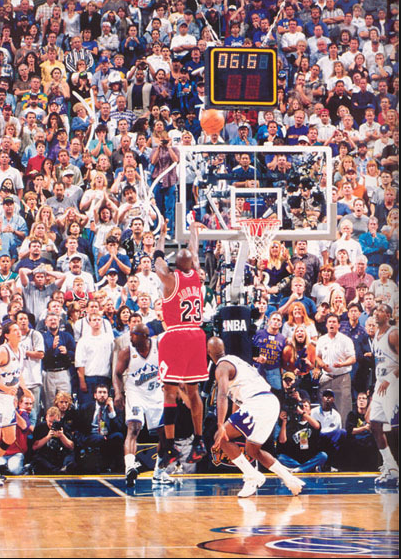

In [11]:
Image(filename='michael_jordan.png')

 # Data
 * **shot_logs_2014_2015.csv** -contains shots log data from NBA basketball 2014-2015 season https://www.kaggle.com/dansbecker/nba-shot-logs
 * **players_stats_2014_2015.csv** - contains NBA players information data from 2014-2015 season https://www.kaggle.com/drgilermo/nba-players-stats-20142015
 * **Web site with left handed basketball players**- contains left handed NBA players data  http://www.apbr.org/lefties.html 

#  Data columns 

## Transformed variables
* **SHOOTER_NAME,DEFENDER_NAME**- all players name from all 3 data sources (shot_logs_2014_2015.csv,players_stats_2014_2015.csv,Web site with left handed basketball players) where transformed to the same format ,as they used as key's for merging between data sets.
* **SHOT_DIST**-transformed from feets to closest 0.5 meters
* **CLOSE_DEF_DIST**-transformed from feets to closest 0.5 meters
* **CLOSE_DEF_DIST**-transformed from feets to closest 0.5 meters
* **SHOOTERS_TEAM_FINAL_RESULT** - transformed from 'W' 'L' to 0 1


##  Variables Added
* **SHOOTER_STRONG_HAND**- indicates shooters strong hand (right,left)
* **DEFENDER_STRONG_HAND**- indicates defenders strong hand (right,left)
* **SHOTS_IN_ROW**- indicates shoot in a row made in current game before current shot
* **MISS_IN_ROW**- indicates shoot in a row missed in current game before current shot
* **HEIGHT_DIFF** - indicates height diff between shooters name and defender height rounded to closest 5 cm
* **IS_MONEY_TIME** - indicates if a shoot made is money time shot
* **IS_HOME_TEAM_WIN** - indicates if home time win


##  Final Data Variables 
 
 * **SHOOTERS_COURT_LOCATION**- indication of shooters court.H for home A for away
 * **SHOOTERS_TEAM_FINAL_RESULT**- shooters team final result 1 for win 0 for lose
 * **SHOOTERS_FINAL_RESULT_DIFF**- shooters team final result diff (for example if shooters team win 82:70 the value will be 12,if shooters team lose 82:70 the value will be -12)
 * **PERIOD**- period when shot was taken 1-4 (in case of over time period >4)
 * **SHOT_CLOCK**-time remaing for 24 clock (rounded to closest 0.5)
 * **DRIBBLES**- dribbles before shooting
 * **TOUCH_TIME** - touching in seconds time of the ball before shooting (rounded to closest 1)
 * **SHOT_DIST**- distance in meters of shooter from basket (rounded to closest 0.5)
 * **PTS_TYPE** - 2 for 2 point shot 3 for 3 point shot
 * **SHOT_RESULT**- 'made' for shot made 'missed' for shot miss
 * **CLOSE_DEF_DIST**- distance in meters of closest defender from shooter (rounded to closest 0.5)
 * **SHOT_RESULT_INT**- 1 for shot made 0 for shot miss
 * **SHOOTER_NAME**- shooters name
 * **DEFENDER_NAME**- defenders name
 * **SHOOTERS_HEIGHT**- shooters height in centimeters
 * **SHOOTERS_POS** - shooters position (PG,SG,SF,PF,C)
 * **DEFENDER_HEIGHT** - defenders height in  centimeters
 * **DEFENDER_POS** - defenders position (PG,SG,SF,PF,C)
 * **SHOOTER_STRONG_HAND** -shooters strong hand right or left
 * **DEFENDER_STRONG_HAND** -defenders strong hand right or left
 * **SHOTS_IN_ROW**-shots in a row made in the current game before current shot (-1 indicates for first shot in the current game)
 * **MISS_IN_ROW** -shots in a row miss in the current game before current shot (-1 indicates for first shot in the current game)
 * **HEIGHT_DIFF** - height diff in centimeters between shooters height and defenders height-rounded to closest 5 (if shooter higher than defender the value will be positive if shooter lower than defender value will be negative)
 * **IS_MONEY_TIME** - indicates if the shot was taken in 'money time' 1 indicates for money time 0 indicates for not money time

 ### Record Example


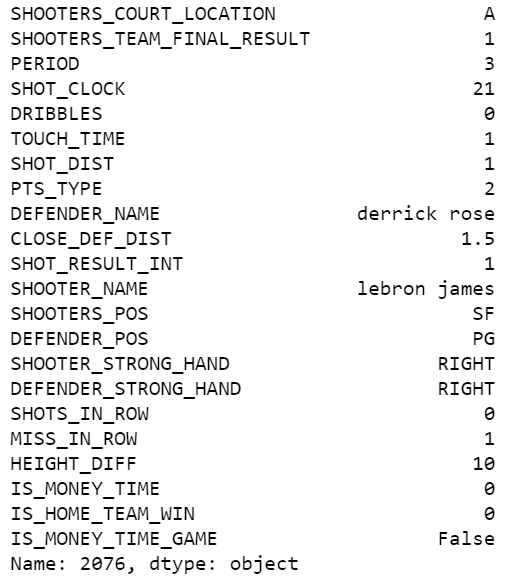

In [12]:

Image(filename='record_example.png')

 # Data Cleaning 
 ### decisions


* removed rows where one of the  columns **value is NA**
* removed rows where  **TOUCH_TIME<0** (recognized some negative values)
* removed rows where value of  **SHOT_DIST>9** (if 3 point shot is ~7 and half court dist is ~14  ,9 seems to be a good limit where we get good indication on shot precentege)
* removed rows  **PERIOD>5** (regular game is 4 periods 5 periods are when the game is tie after 4 periods)
* removed rows where value of  **CLOSE_DEF_DIST>7** ( I took threshold of 8 that seems that above this value where defender is  > 7 meter from shooter (for example if defence still the ball and passes fast to a shooter that goes alone to shoot the basket from 0-1 meters - probably will score) ,are rare situations that dont give indication on shot precentege )
* removed rows where **TOUCH_TIME> 18** (outliers)
* removed rows where  **SHOT_CLOCK > 16** (outliers)
* removed rows where  **DRIBBLES > 21** (outliers)
<br>

 ### **Total records after cleaning data :82524**


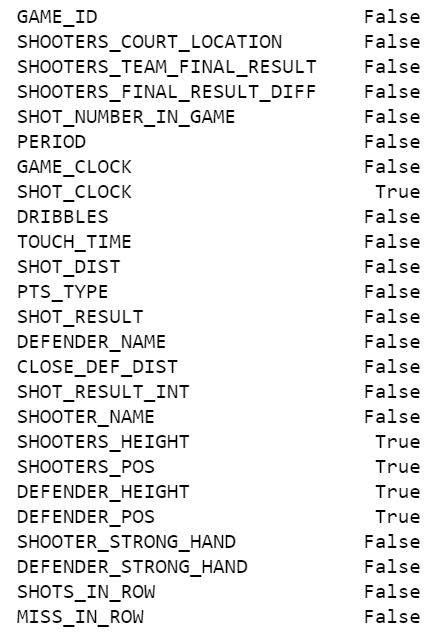

In [13]:
Image(filename='naValues.png')


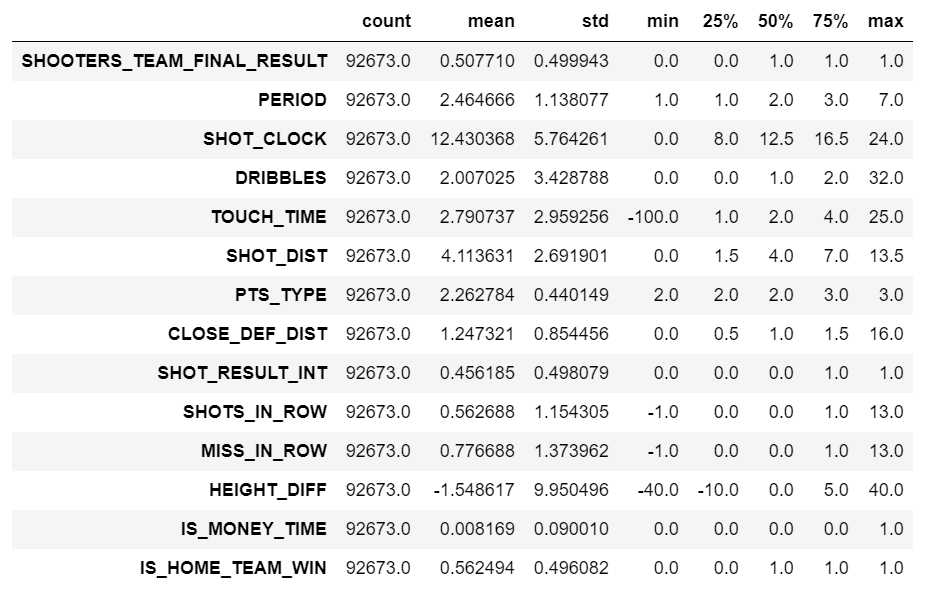

In [14]:

Image(filename='desc_plot.png')


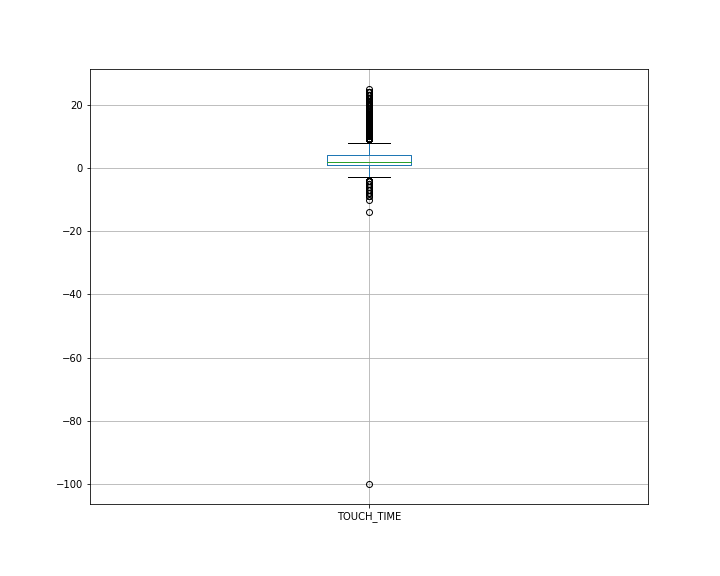

In [15]:

Image(filename='BoxPlotTouchTime.png')

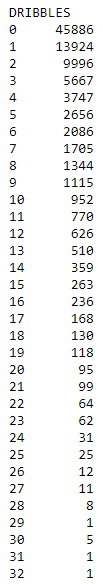

In [16]:

Image(filename='DribblesStatistic.png')

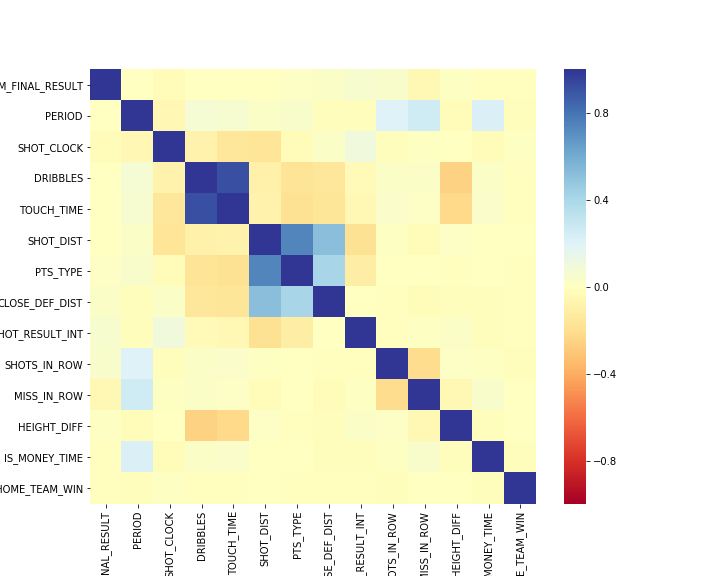

In [17]:
Image(filename='corrMap.png')

#  Visualization

### Shot Percenteage By Court Location

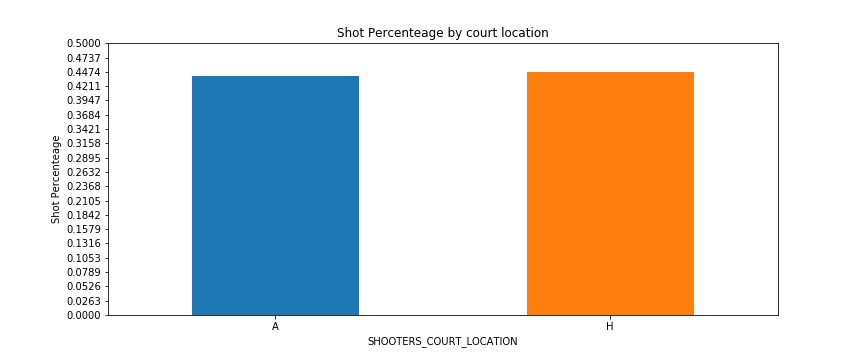

In [18]:

Image(filename='ShotPercenteageByCourtLocation.png')

### Shot Percenteage By Money Time

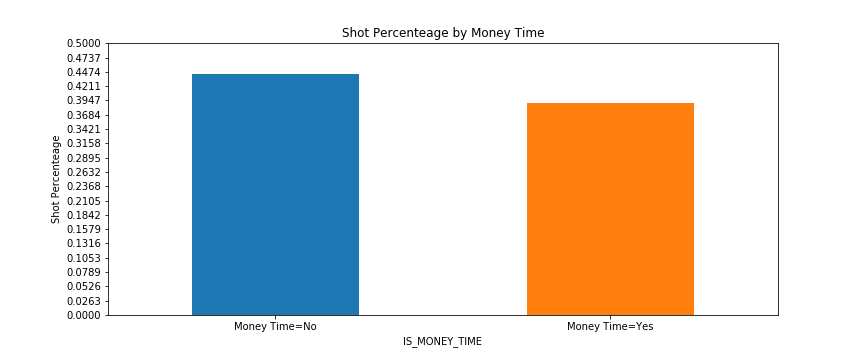

In [19]:

Image(filename='ShotPercenteageByMoneyTime.png')

### Shot Percenteage By Court Location Money Time

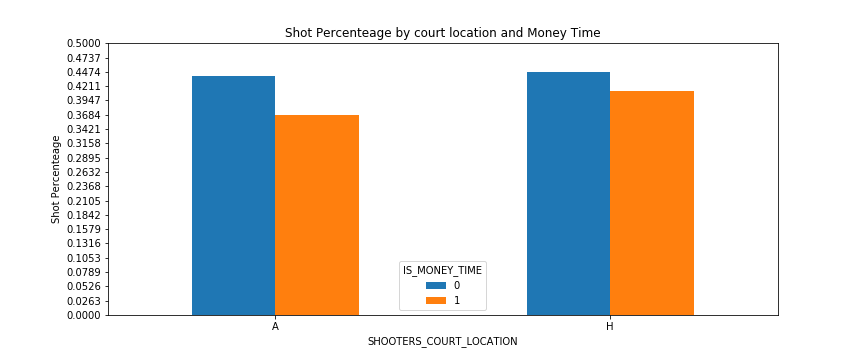

In [20]:

Image(filename='ShotPercenteageByCourtLocationMoneyTime.png')

### Shot Percenteage By Position and Money Time

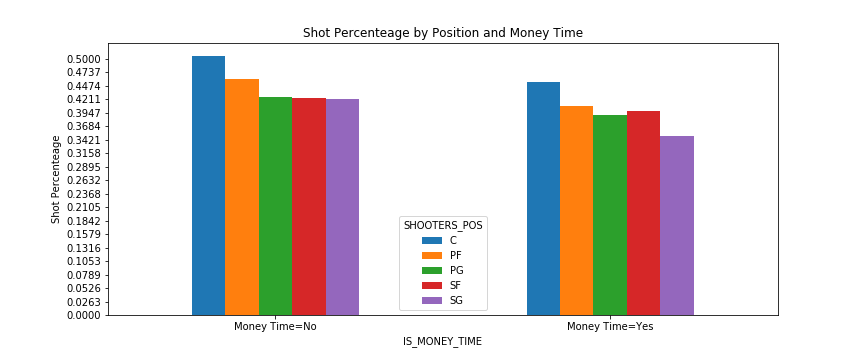

In [21]:

Image(filename='ShotPercenteageByPositionMoneyTime.png')

### Shot Percenteage By Period and Position

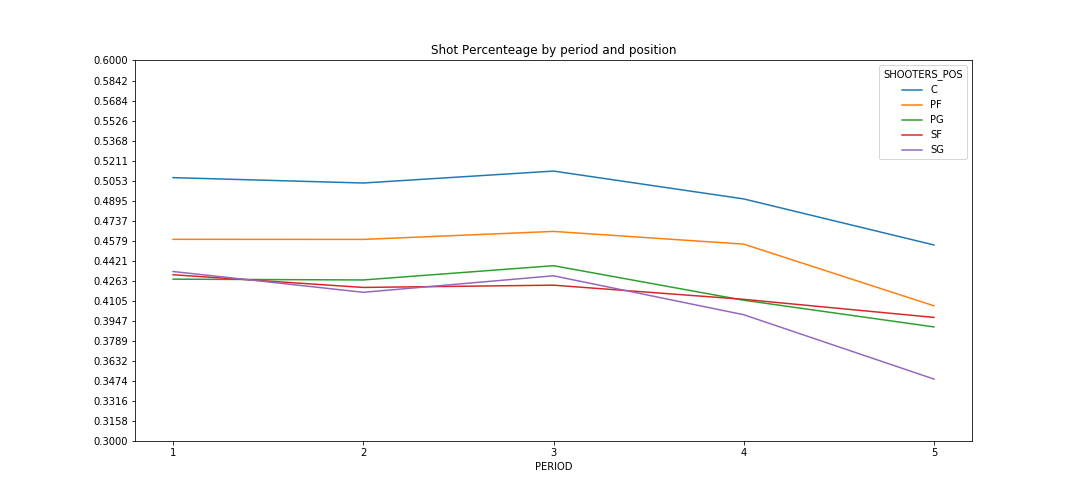

In [22]:

Image(filename='ShotPercenteageByPeriodPosition.png')

### Shot Percenteage By Position

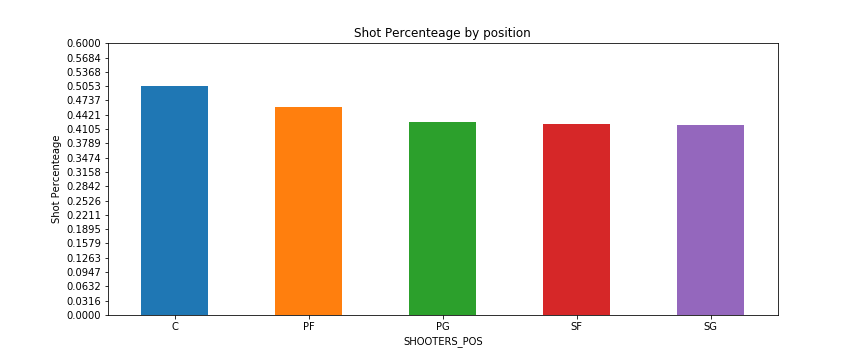

In [23]:

Image(filename='ShotPercenteageByPosition.png')

### Shot Percenteage By Dribbles before shot

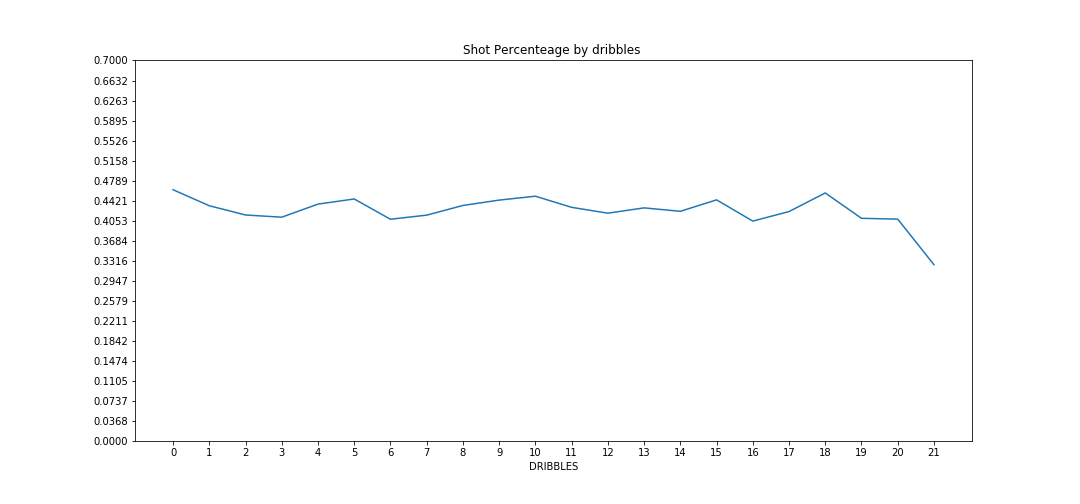

In [24]:

Image(filename='ShotPercenteageByDribbles.png')

### Shot Percenteage By 24 Clock

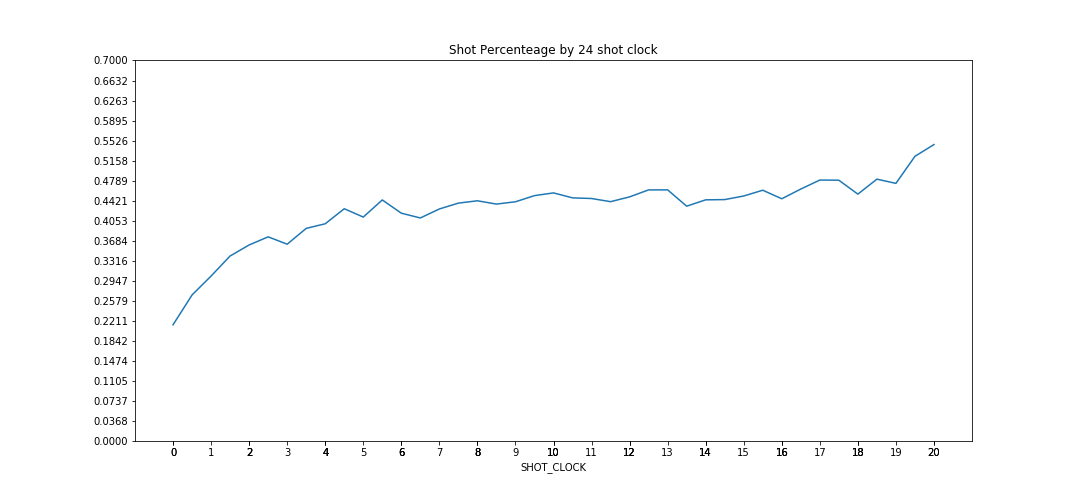

In [25]:

Image(filename='ShotPercenteageBy24Clock.png')

### Shot Percenteage by TouchTime before shot

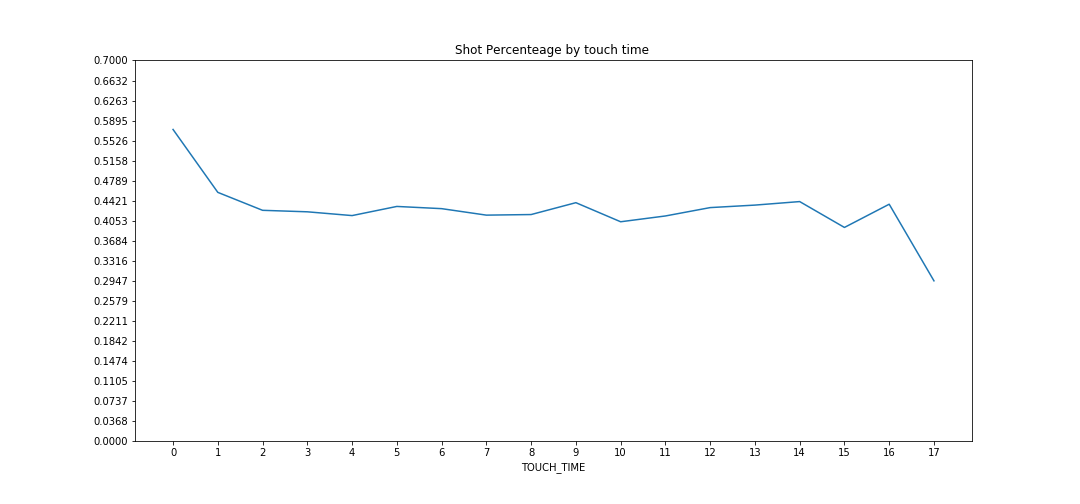

In [26]:

Image(filename='ShotPercenteageTouchTime.png')

### Shot Percenteage by Shot Dist

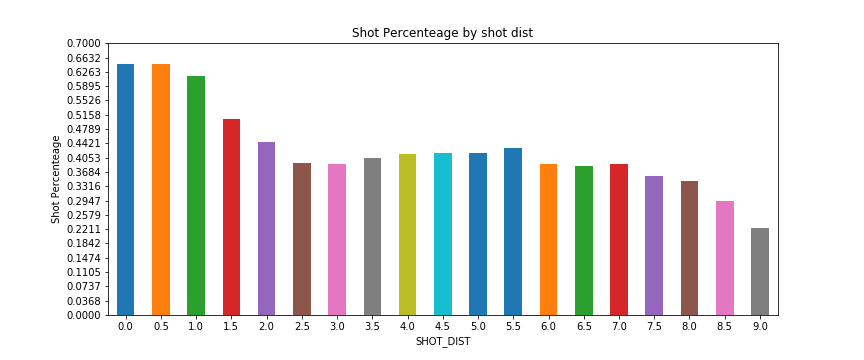

In [27]:

Image(filename='ShotPercenteageShotDist.png')

### Shot Percenteage Defender Dist

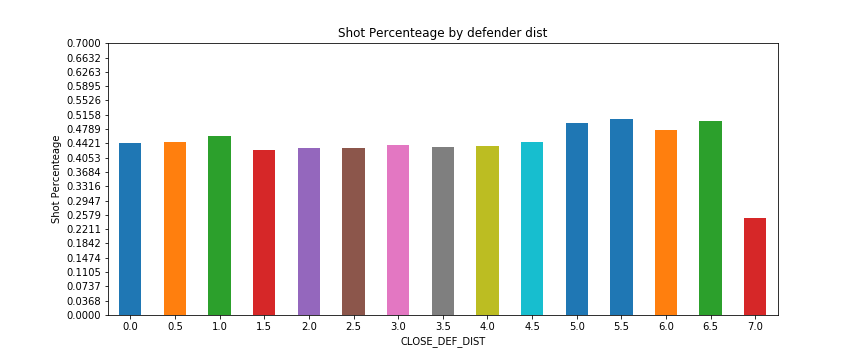

In [28]:

Image(filename='ShotPercenteageDefenderDist.png')

### Shot Percenteage Shot Dist and Position

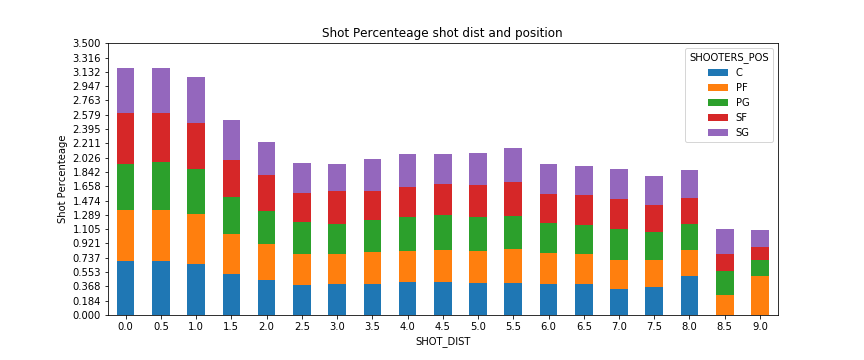

In [29]:

Image(filename='ShotPercenteageShotDistPosition.png')

### Shot Percenteage By Shooter Strong Hand

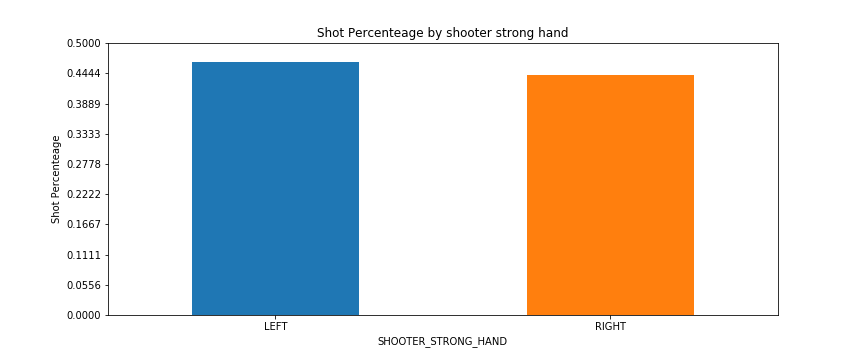

In [30]:

Image(filename='ShotPercenteageByShooterStrongHand.png')

### Shot Percenteage By Defenders Strong Hand

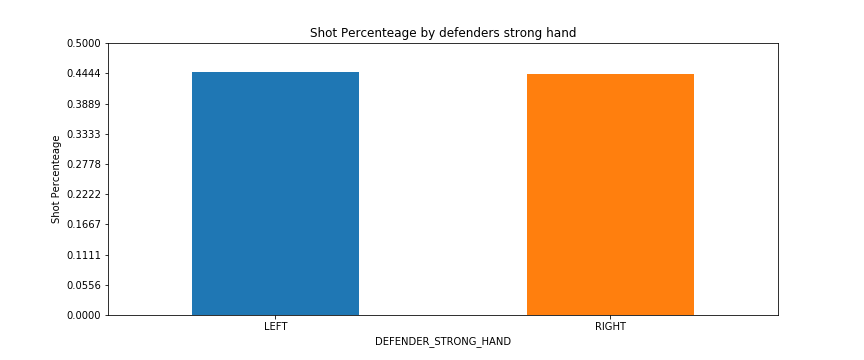

In [31]:

Image(filename='ShotPercenteageByDefendersStrongHand.png')

### Shot Percenteage by Position And Shots Made In Row

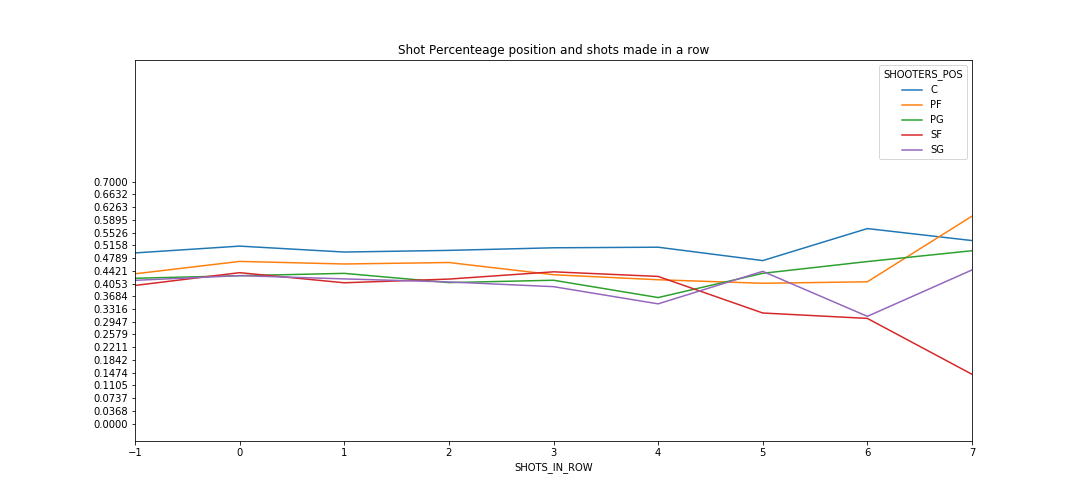

In [32]:

Image(filename='ShotPercenteagePositionAndShotsMadeInRow.png')

### Shot Percenteage by Position And Shots Miss In Row

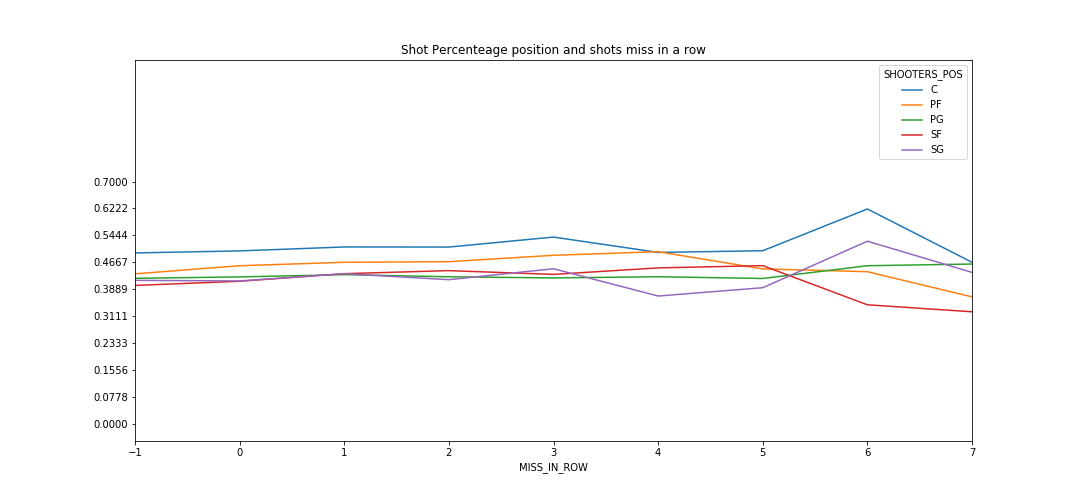

In [33]:

Image(filename='ShotPercenteagePositionAndShotsMissInRow.png')

### Shot Percenteage By Height Diff and Position

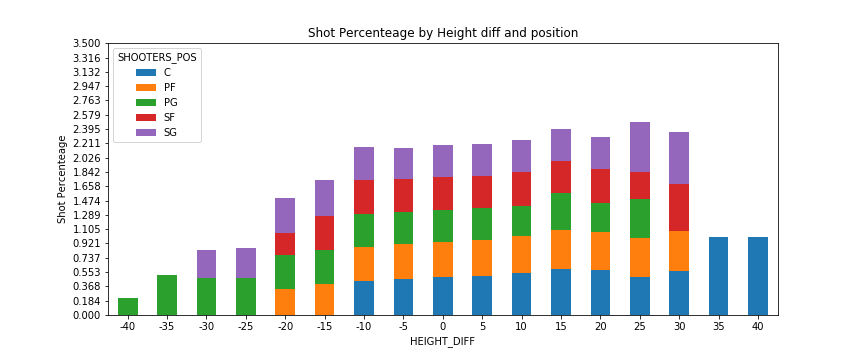

In [34]:
Image(filename='ShotPercenteageByHeightDiffPosition.png')

### Histogram Shots Dist

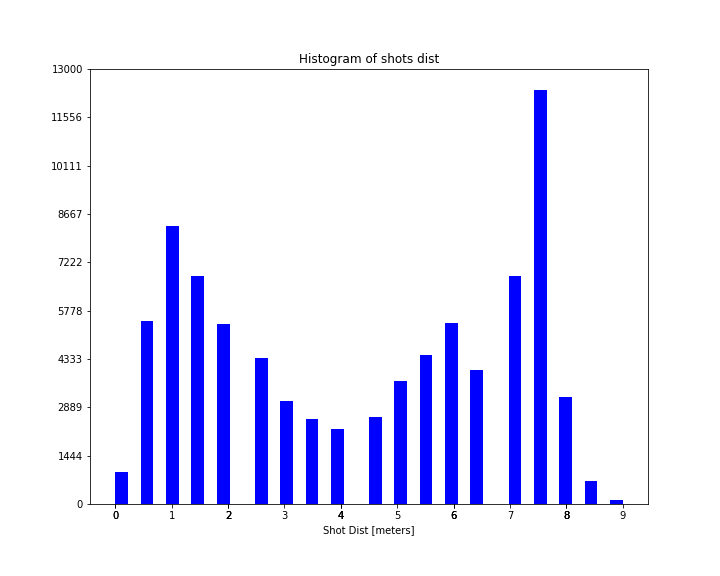

In [35]:

Image(filename='HistogramShotsDist.png')

### Percenteage Home Team Win in MoneyTime games

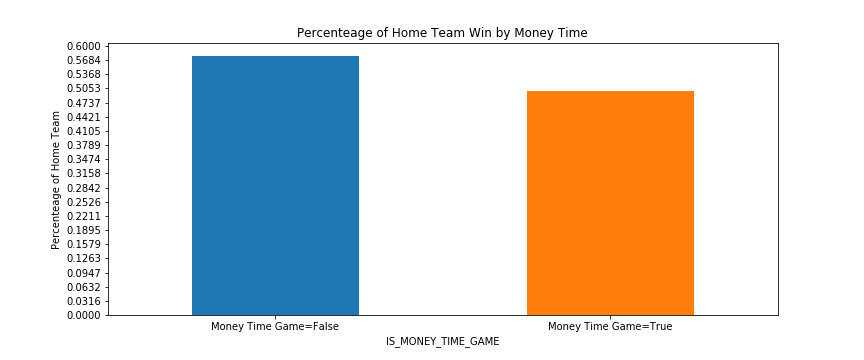

In [36]:

Image(filename='PercenteageHomeTeamWinMoneyTime.png')

#  Visualization Lebron James vs Kobe Bryant

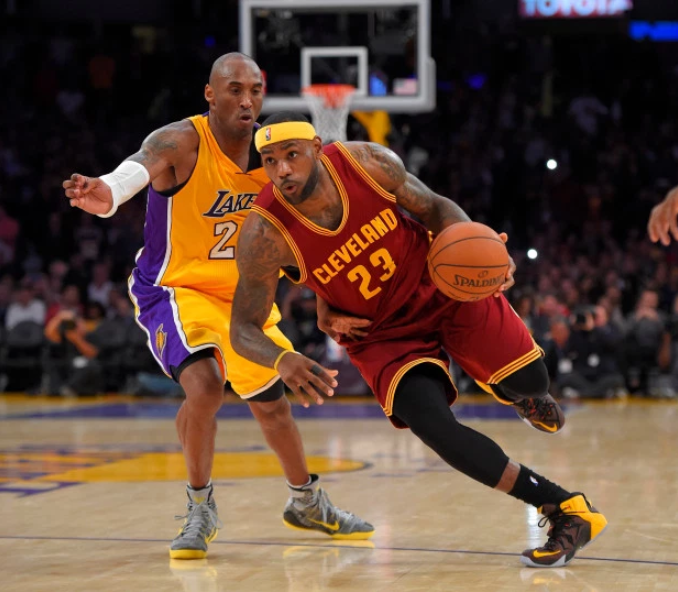

In [37]:
Image(filename='lebronVsKobe.png')

### Percenteage Kobe Bryant vs lebron james


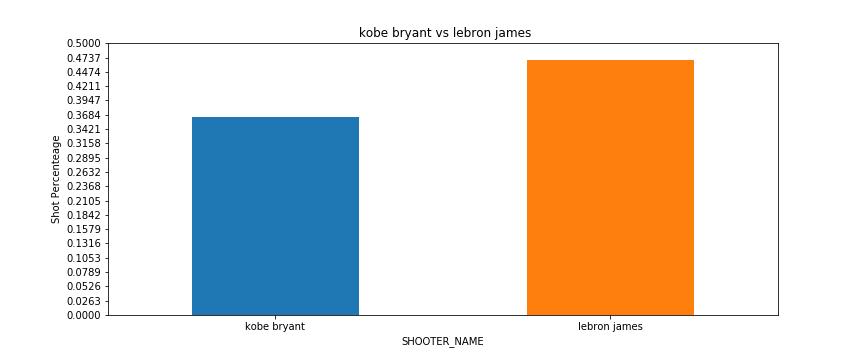

In [38]:

Image(filename='ShotPercenteageByPlayer.png')

### Percenteage Kobe Bryant vs lebron james in Money Time Games


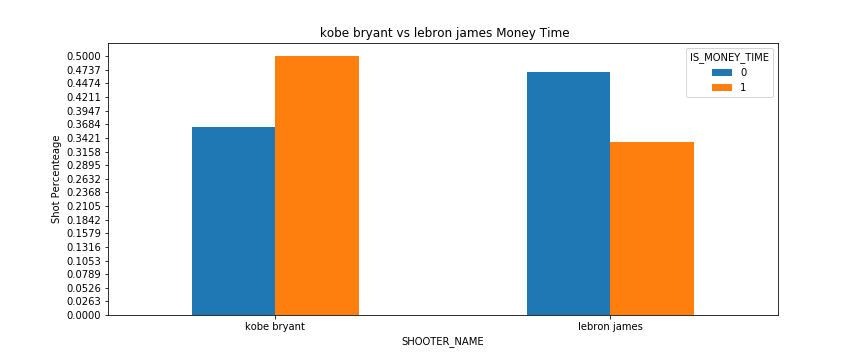

In [39]:

Image(filename='ShotPercenteageByPlayerMoneyTime.png')

### Percenteage Kobe Bryant vs lebron james by Court


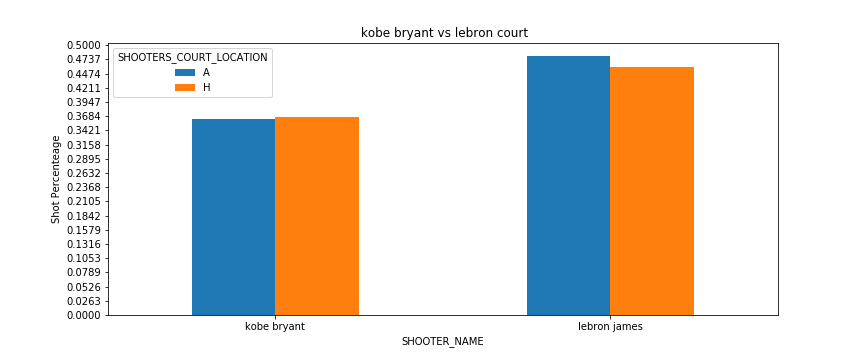

In [40]:

Image(filename='ShotPercenteageByPlayerCourt.png')